In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle


### Example - 4.2

### Aim 
#### actions represent all the action that the dealer can take, negative represent moving cars the other way. At the end of the day, given the state and the policy, we would calculate the state-value function and then try to improve it. 

In [15]:
def poisson(lambdaa, x):
    if(poisson_array[lambdaa][x]!=0):
        return poisson_array[lambdaa][x]
    poisson_array[lambdaa][x] = np.exp(-lambdaa) * pow(lambdaa, x) / math.factorial(x)
    return poisson_array[lambdaa][x]


def get_reward(state, action, feature):
    reward = cost*abs(action)
    if(feature):
        if(action > 0):
            reward += 2
    cars1 = min(state[0] - action, cars)
    cars2 = min(state[1] + action, cars)
    
    for i in range(max_poisson_value):
        for j in range(max_poisson_value):
            
            cars_given_1 = min(cars1, i)
            cars_given_2 = min(cars2, j)
            prob_renting = poisson(lambda_rent_1, i)*poisson(lambda_rent_2, j)
            earned = (cars_given_1 + cars_given_2)*profit
            for k in range(max_poisson_value):
                for l in range(max_poisson_value):

                    prob_return = poisson(lambda_return_1, k)*poisson(lambda_return_2, l)*prob_renting
                    
                    final_cars_1 = int(min(cars1 - cars_given_1 + k, cars))
                    final_cars_2 = int(min(cars2 - cars_given_2 + l, cars))
                    overnight = 0
                    if(feature):
                        if(final_cars_1 > 10):
                            overnight -= 4
                        if(final_cars_2 > 10):
                            overnight -= 4
                    reward += prob_return*(overnight + earned + gamma*values[final_cars_1][final_cars_2])
                        
    return reward

In [16]:
# Initialization
thresh = 1e-20
gamma = 0.9
cars = 20
state = [[i, j] for i in range(cars+1) for j in range(cars+1)]
profit = 10
cost = -2
lambda_rent_1 = 3
lambda_rent_2 = 4
lambda_return_1 = 3
lambda_return_2 = 2
max_cars_move = 5
values = np.zeros([cars+1, cars+1])
policy = np.zeros([cars+1, cars+1])
actions = np.arange(-5, 6)
poisson_array = np.zeros([20, 20], dtype = float)
values_policy_map = []
max_poisson_value = 10
iteration = 0
policy_stable = False

In [17]:
exercise = True
while policy_stable == False:
    print("Iteration Starting now -", iteration)
    iteration+=1
    while True:
        for s in state:
            delta = 0
            v = get_reward(s, policy[s[0]][s[1]], exercise)
            delta = max(delta, abs(v - values[s[0]][s[1]]))
            values[s[0]][s[1]] = v
        print(delta, "generating value function for policy in iteration - ", iteration)
        if(delta < 1e-4):
            print("value function for policy generated")
            break
    values_policy_map.append((policy.copy(), values.copy()))


    new_policy = np.zeros([cars+1, cars+1])
    for si, sj in state:
        action_list = []
        for action in actions:
            if(action > 0):
                if(si >= action):
                    action_list.append(get_reward([si, sj], action, exercise))
                else:
                    action_list.append(-1e9)
            else:
                if(sj >= abs(action)):
                    action_list.append(get_reward([si, sj], action, exercise))
                else:
                    action_list.append(-1e9)
        best_action = np.argmax(action_list)
        new_policy[si][sj] = actions[best_action]
    if(np.sum(new_policy != policy) == 0):
        policy_stable = True
        print("stable policy generated")
    else:
        print("improving policy")
    policy = new_policy


Iteration Starting now - 0
167.55783985680554 generating value function for policy in iteration -  1
99.37898015684058 generating value function for policy in iteration -  1
65.26827045348557 generating value function for policy in iteration -  1
44.22870696185498 generating value function for policy in iteration -  1
31.03807725533494 generating value function for policy in iteration -  1
22.640950592779063 generating value function for policy in iteration -  1
17.070461516304988 generating value function for policy in iteration -  1
13.176529102714142 generating value function for policy in iteration -  1
10.32383095832455 generating value function for policy in iteration -  1
8.161337845947344 generating value function for policy in iteration -  1
6.485780867610799 generating value function for policy in iteration -  1
5.170424164771362 generating value function for policy in iteration -  1
4.129940410220854 generating value function for policy in iteration -  1
3.303190603620749 ge

0.00011726319814897579 generating value function for policy in iteration -  2
9.405808407336735e-05 generating value function for policy in iteration -  2
value function for policy generated
improving policy
Iteration Starting now - 2
2.5191470426775595 generating value function for policy in iteration -  3
2.42156954996301 generating value function for policy in iteration -  3
1.7979915458595315 generating value function for policy in iteration -  3
1.2198012068677144 generating value function for policy in iteration -  3
0.7994792876264682 generating value function for policy in iteration -  3
0.5202088958582181 generating value function for policy in iteration -  3
0.3416976257610713 generating value function for policy in iteration -  3
0.22905039516979286 generating value function for policy in iteration -  3
0.1576828266006487 generating value function for policy in iteration -  3
0.11172441521068777 generating value function for policy in iteration -  3
0.08137584670146225 gener

In [4]:
with open('4.2pickle', 'rb') as handle:
    values_policy_map = pickle.load(handle)

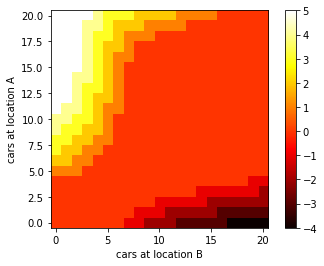

In [10]:
plt.imshow(values_policy_map[4][0], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.ylabel('cars at location A')
plt.xlabel('cars at location B')
plt.gca().invert_yaxis()
plt.show()

### Exercise - 4.7

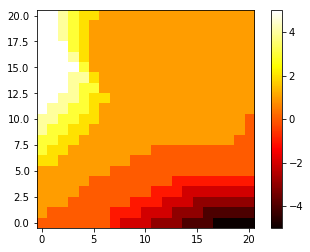

In [19]:
plt.imshow(values_policy_map[2][0], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()